In [2]:
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import janitor 
import geopandas as gpd

In [ ]:
# for csvs
#data_2020 = pd.read_csv("311_data/311_2020.csv")
#data_2021 = pd.read_csv("311_data/311_2021.csv")
#data_2022 = pd.read_csv("311_data/311_2022.csv")
#data_2023 = pd.read_csv("311_data/311_2023.csv")
#data_2024 = pd.read_csv("311_data/311_2024.csv")

In [ ]:
# for shapefiles

#data_2024 = gpd.read_file("311_data/311_2024_shapes/311_2024.shdata_2020 = gpd.read_file("311_data/311_2020_shapes/311_2020.shp")
##data_2021 = gpd.read_file("311_data/311_2021_shapes/311_2021.shp")
#data_2022 = gpd.read_file("311_data/311_2022_shapes/311_2022.shp")
#data_2023 = gpd.read_file("311_data/311_2023_shapes/311_2023.shp")p")


In [ ]:
#datasets = [data_2020 , data_2021, data_2022, data_2023, data_2024]
#for data in datasets:
    #data = data.clean_names()

In [ ]:
# # Code copied from Ray's Feasability
# Create a dictionary to store all the data
#data_dict = {
    #2020: data_2020,
    #2021: data_2021,
    #2022: data_2022,
    #2023: data_2023,
    #2024: data_2024
#}

#for year, df in data_dict.items():
    #print(f"data_{year}: {df.shape}")

# Check the consistency of the columns
#for year, df in data_dict.items():
    #print(f"{year}: {df.columns}")

### Standardize the column names

In [ ]:
# Rename some columns in data_2020
'''
data_2020_clean = data_2020.drop(["service__1", "service__2", "FID", "public_url", "specify_th"], axis=1)
data_2020_clean.rename(columns={"X": "x",
                          "Y": "y",
                          "service_re": "service_request_id",
                          "sap_notifi": "sap_notification_number",
                          "case_age_d": "case_age_days",
                          "case_recor": "case_record_type",
                          "service_na": "service_name",
                          "street_add": "street_address",
                          "council_di": "council_district",
                          "comm_plan_": "comm_plan_code",
                          "comm_plan1": "comm_plan_name",
                          "case_origi": "case_origin",
                          "public_des": "public_description",
                          "date_reque": "date_requested",
                          "date_close": "date_closed",

                          }, inplace=True)

'''



In [ ]:
# Only select the new 2020 columns from the other years
#print(data_2020_clean.columns)
'''
data_2021_clean = data_2021.reindex(columns = data_2020_clean.columns)
#print(data_2021_clean.columns)
data_2022_clean = data_2022.reindex(columns = data_2020_clean.columns)
data_2023_clean = data_2023.reindex(columns = data_2020_clean.columns)
data_2024_clean = data_2024.reindex(columns = data_2020_clean.columns)
'''

In [ ]:
# add a column for the year

Concatenate the 311 datasets by row (stacked on top of each other)

In [ ]:
#data_concat = pd.concat([data_2020_clean, data_2021_clean, data_2022_clean, data_2023_clean, data_2024_clean])

In [ ]:
#data_concat.head()

Create an variable on the proportion of letters that are all caps (besides the start of a sentence)

In [ ]:
'''
def remove_sentence_starts(text):
    if pd.isna(text):
        return ""
    return re.sub(r'(^[A-Z])|(?<=[.!?]\s)[A-Z]', '', text)

no_sentence_starts = data_concat["public_description"].apply(remove_sentence_starts)
data_concat["prop_uppercase"] = (no_sentence_starts.str.count(r"[A-Z]"))/(no_sentence_starts.str.len())
'''

In [ ]:
#data_concat["prop_uppercase"]

In [ ]:
#data_concat[["public_description","prop_uppercase"]]

In [ ]:
'''
# From Ray's Feasability
def clean_text(df, col_name):
    return (
        df[col_name]
        .fillna("")     #Replaces all missing values with an empty string ""
        .str.lower()    #Converts all text to lowercase
        .str.replace(f"[{string.punctuation}]", "", regex=True) #Removes all punctuation marks from the text
        .str.replace(r"\s+", " ", regex=True) #Replaces multiple spaces or whitespace characters
        .str.strip()    #Removes leading and trailing spaces from each text string
    )

data_concat["clean_text"] = clean_text(data_concat, "public_description")
data_concat["word_count"] = data_concat["clean_text"].str.split().str.len()
'''

In [ ]:
'''
data_concat.head()
len(data_concat)
'''

In [ ]:
'''
# reproject to California Zone 6
data_concat = data_concat.to_crs(epsg=2230)
'''

In [ ]:
# save to csv
#data_concat.to_csv("all_years_311.csv", index=False)

In [ ]:
# save to shp
#data_concat.to_file("modified_data/all_years_311.shp")

In [90]:
all_years_gdf = gpd.read_file("311_data/all_years_311_points.gpkg")

In [5]:
all_years_gdf.columns

Index(['service_request_id', 'sap_notification_number', 'date_requested',
       'case_age_days', 'case_record_type', 'date_closed', 'status', 'lat',
       'lng', 'street_address', 'zipcode', 'council_district',
       'comm_plan_code', 'comm_plan_name', 'park_name', 'case_origin',
       'referred', 'iamfloc', 'floc', 'public_description', 'Case Number',
       'Department', 'Date/Time Opened', 'Case Reason',
       'Display Referral Information', 'prop_uppercase', 'prop_all_caps',
       'num_exclamation', 'num_question', 'clean_text', 'word_count',
       'clean_text_for_sentiment', 'misspelled_words', 'num_misspelled',
       'year', 'month', 'day', 'date', 'time', 'time_period', 'week_type',
       'geometry'],
      dtype='object')

### Spatial join with Land Use

In [5]:
land_use = gpd.read_file("other_data/Land_Use_2024_shapefile/Land_Use_2024.shp")

In [6]:
land_use.head()

,lu,DESCRIPTIO,Shape_Leng,Shape_Area,geometry
0,1000,Spaced Rural Residential,1870.505325,1.996575e+05,"POLYGON ((6255211.907 1968923.648, 6255145.479..."
1,1000,Spaced Rural Residential,13832.316321,1.785618e+06,"POLYGON ((6263645.217 1970229.288, 6263610.985..."
2,1000,Spaced Rural Residential,3976.166582,6.769741e+05,"POLYGON ((6263874.387 1972038.938, 6263875.65 ..."
3,1000,Spaced Rural Residential,4102.026813,3.419031e+05,"POLYGON ((6265785.134 1972597.327, 6265787.982..."
4,1000,Spaced Rural Residential,892.139662,4.798404e+04,"POLYGON ((6247057 1980319, 6247009.999 1980242..."


In [7]:
print(land_use.DESCRIPTIO.unique())
len(land_use.DESCRIPTIO.unique())

['Spaced Rural Residential' 'Spaced Rural Residential Without Units'
 'Single Family Detached' 'Single Family Multiple-Units'
 'Single Family Residential Without Units' 'Multi-Family Residential'
 "Single Room Occupancy Units (SRO's)"
 'Multi-Family Residential Without Units' 'Mobile Home Park' 'Jail/Prison'
 'Dormitory' 'Military Barracks' 'Monastery'
 'Other Group Quarters Facility' 'Hotel/Motel (Low-Rise)'
 'Hotel/Motel (High-Rise)' 'Resort' 'Heavy Industry' 'Industrial Park'
 'Light Industry - General' 'Warehousing' 'Public Storage'
 'Extractive Industry' 'Junkyard/Dump/Landfill' 'Commercial Airport'
 'Military Airport' 'General Aviation Airport' 'Airstrip'
 'Rail Station/Transit Center' 'Freeway' 'Communications and Utilities'
 'Parking Lot - Surface' 'Parking Lot - Structure' 'Park and Ride Lot'
 'Railroad Right of Way' 'Road Right of Way' 'Other Transportation'
 'Marine Terminal' 'Wholesale Trade' 'Regional Shopping Center'
 'Community Shopping Center' 'Neighborhood Shopping Cen

104

KeyboardInterrupt: 

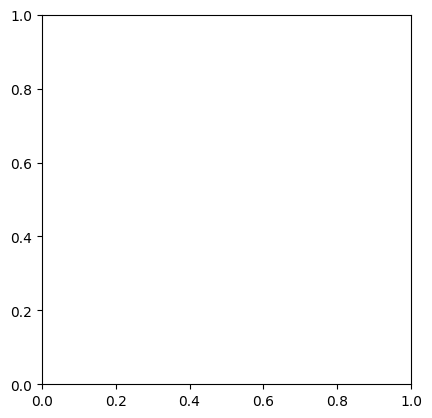

In [8]:
land_use.plot(column="DESCRIPTIO")


Condense into fewer categories: 
- Residential
- Institutional/Group Quarters
- Industrial
- Commercial
- Transportation/Utilities
- Recreation/Open Space
- Agricultural
- Water/Natural Features
- Vacant/Under Construction

In [9]:


land_use['land_use_binned'] = land_use['DESCRIPTIO'].case_when(
    [
        # Residential
       (land_use['DESCRIPTIO'].isin([
            'Spaced Rural Residential', 'Spaced Rural Residential Without Units',
            'Single Family Detached', 'Single Family Multiple-Units',
            'Single Family Residential Without Units', 'Multi-Family Residential',
            'Multi-Family Residential Without Units', 'Mobile Home Park',
            "Single Room Occupancy Units (SRO's)"
        ]), "Residential"),

        # Institutional / Group Quarters
        (land_use['DESCRIPTIO'].isin([
            'Jail/Prison', 'Dormitory', 'Military Barracks', 'Monastery',
            'Other Group Quarters Facility', 'UCSD/VA Hospital/Balboa Hospital',
            'Hospital - General', 'Other Health Care', 'Military Use',
            'Military Training', 'Weapons Facility', 'SDSU/CSU San Marcos/UCSD',
            'Other University or College', 'Junior College', 'Senior High School',
            'Junior High School or Middle School', 'Elementary School',
            'School District Office', 'Other School', 'Library', 'Post Office',
            'Mission', 'Religious Facility', 'Other Public Services', 'Fire/Police Station'
        ]), "Institutional"),

        # Industrial
        (land_use['DESCRIPTIO'].isin([
            'Heavy Industry', 'Industrial Park', 'Light Industry - General',
            'Warehousing', 'Public Storage', 'Extractive Industry',
            'Junkyard/Dump/Landfill'
        ]), "Industrial"),

        # Commercial
        (land_use['DESCRIPTIO'].isin([
            'Wholesale Trade', 'Regional Shopping Center', 'Community Shopping Center',
            'Neighborhood Shopping Center', 'Specialty Commercial',
            'Automobile Dealership', 'Arterial Commercial', 'Service Station',
            'Other Retail Trade and Strip Commercial', 'Office (High-Rise)',
            'Office (Low-Rise)', 'Government Office/Civic Center','Hotel/Motel (High-Rise)', 'Hotel/Motel (Low-Rise)', 'Resort',
            'Cemetery'
        ]), "Commercial"),

        # Mixed use
        (land_use['DESCRIPTIO'].isin(["Mixed Use"]), "Mixed Use"),

        # Transportation / Utilities
        (land_use['DESCRIPTIO'].isin([
            'Commercial Airport', 'Military Airport', 'General Aviation Airport',
            'Airstrip', 'Rail Station/Transit Center', 'Freeway', 'Road Right of Way',
            'Railroad Right of Way', 'Park and Ride Lot', 'Parking Lot - Surface',
            'Parking Lot - Structure', 'Other Transportation',
            'Communications and Utilities', 'Marine Terminal'
        ]), "Transportation"),

        # Recreation / Open Space
        (land_use['DESCRIPTIO'].isin([
            'Tourist Attraction', 'Stadium/Arena', 'Racetrack', 'Golf Course',
            'Golf Course Clubhouse', 'Convention Center', 'Marina',
            'Olympic Training Center', 'Casino', 'Other Recreation - High',
            'Other Recreation - Low', 'Park - Active', 'Open Space Park or Preserve',
            'Beach - Active', 'Beach - Passive', 'Landscape Open Space',
            'Residential Recreation', 'Undevelopable Natural Area'
        ]), "Rec / Open Space"),

        #  Agricultural
        (land_use['DESCRIPTIO'].isin([
            'Orchard or Vineyard', 'Intensive Agriculture', 'Field Crops'
        ]), "Agricultural"),

        #  Water / Natural
        (land_use['DESCRIPTIO'].isin([
            'Water', 'Bay or Lagoon', 'Lake/Reservoir/Large Pond'
        ]), "Water"),


        #  Vacant 
        (land_use['DESCRIPTIO'].isin([
            'Vacant and Undeveloped Land','Residential Under Construction', 'School Under Construction',
            'Industrial Under Construction', 'Office Under Construction', 'Commercial Under Construction',
            'Freeway Under Construction', 'Road Under Construction'
        ]), "Vacant / Under Construction")
    ]
    
)


In [ ]:
land_use.head()

In [10]:
land_use.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Join with 311 data

In [21]:
print(all_years_gdf.crs)
print(land_use.crs)

EPSG:2230
EPSG:2230


<Axes: >

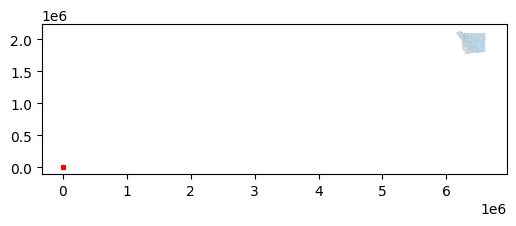

In [23]:
ax = land_use.plot(figsize=(6,6), alpha=0.3)
all_years_gdf.plot(ax=ax, color="red", markersize=5)


In [17]:
land_use_311 = gpd.sjoin(all_years_gdf, land_use, how="left", predicate="within")


In [18]:
land_use_311.head()

,service_re,sap_notifi,date_reque,case_age_d,case_recor,date_close,status,lat,lng,street_add,...,time,time_perio,week_type,geometry,index_right,lu,DESCRIPTIO,Shape_Leng,Shape_Area,land_use_binned
0,3454060,NaN,2021-08-01,12,Neighborhood Policing,2021-08-12 00:00:00,Closed,32.696611,-117.114868,"922 S 37th St, San Diego, CA 92113, USA",...,1,Dark,Weekend,POINT (-117.115 32.697),NaN,NaN,NaN,NaN,NaN,NaN
1,3454993,NaN,2021-08-02,1,Neighborhood Policing,2021-08-03 00:00:00,Closed,32.762736,-117.066252,6106 Adams Ave,...,1,Dark,Weekday,POINT (-117.066 32.763),NaN,NaN,NaN,NaN,NaN,NaN
2,3457547,NaN,2021-08-04,40,Neighborhood Policing,2021-09-13 00:00:00,Referred,32.788346,-117.254238,3947?3951 Strand Way,...,1,Dark,Weekday,POINT (-117.254 32.788),NaN,NaN,NaN,NaN,NaN,NaN
3,3456172,NaN,2021-08-03,30,ESD Complaint/Report,2021-09-02 00:00:00,Closed,32.752666,-117.146516,4130 Park Blvd,...,1,Dark,Weekday,POINT (-117.147 32.753),NaN,NaN,NaN,NaN,NaN,NaN
4,3457550,NaN,2021-08-04,19,ESD Complaint/Report,2021-08-23 00:00:00,Closed,32.746003,-117.159906,525 Evans Place,...,1,Dark,Weekday,POINT (-117.16 32.746),NaN,NaN,NaN,NaN,NaN,NaN


<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# save to shp
land_use_311.to_file("modified_data/augmented_311.shp")

### Add binary variable: whether 2 blocks from transit stop or on railway or not

In [91]:
# read in buffered transit stop shapefile
buff_stops = gpd.read_file("other_data/buffered_transit_stops/transit_stops_buffered.shp")

# read in buffered transit routes shapefile
buff_routes =  gpd.read_file("other_data/buffered_routes/buffered_routes.shp")

In [92]:
# match crs
buff_stops = buff_stops.to_crs(all_years_gdf.crs)
buff_routes = buff_routes.to_crs(all_years_gdf.crs)

In [93]:
# join transit gdfs together
transit = gpd.GeoDataFrame(pd.concat([buff_stops, buff_routes], ignore_index=True))

In [94]:
transit.head()

,stop_UID,stop_agenc,stop_id,stop_name,stop_lat,stop_lon,stop_code,location_t,parent_sta,wheelchair,...,route_id,shape_id,rteshpname,short_name,long_name,route_type,rte_type_t,agency_id,route_url,hex_color
0,MTS_11tbro,MTS,11tbro,11th Ave & Broadway,32.716268,-117.154649,None,1,None,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MTS_12tS,MTS,12tS,12th & Imperial Station,32.706002,-117.153378,None,1,None,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MTS_imtS,MTS,imtS,12th & Imperial Station Bayside,32.705229,-117.154318,None,1,None,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTS_imp12,MTS,imp12,12th & Imperial Transit Center,32.705685,-117.152875,None,1,None,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MTS_24tS,MTS,24tS,24th Street Station,32.661854,-117.108017,None,1,None,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

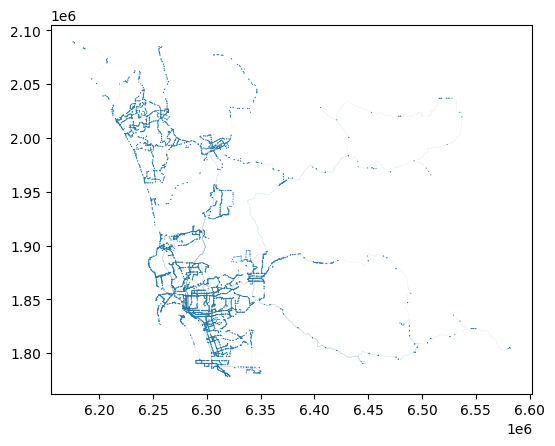

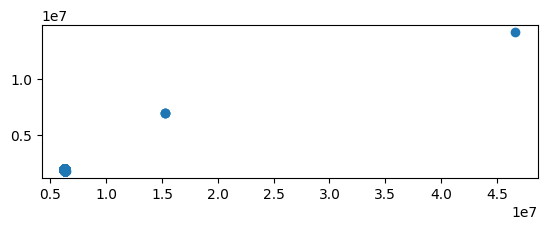

In [95]:
transit.plot()
all_years_gdf.plot()

In [96]:
# join 311 data to transit data
transit_dissolved = transit.dissolve()
transit_311 = gpd.sjoin(all_years_gdf, transit_dissolved, how = "left", predicate="within")

In [97]:
print(transit_311.shape[0])
print(all_years_gdf.shape[0])

213949
213949


In [98]:
transit_311['in_transit_area'] = transit_311['index_right'].notna().astype(int)


# create binary column: if a report is in a park, it will have an index_right value

selected_cols = list(all_years_gdf.columns) + ['in_transit_area']
augmented_311 = transit_311[selected_cols]

### Add binary variable: whether in park or not 

In [99]:
#augmented_311 = gpd.read_file("modified_data/augmented_311.shp")
augmented_311.shape[0]

213949

In [100]:

parks = gpd.read_file("other_data/Parks_SD_shapefile/Parks_SD.shp")

In [101]:
# match projection
parks = parks.to_crs(augmented_311.crs)

In [102]:
# spatial join
parks_dissolved = parks.dissolve()
parks_311 = gpd.sjoin(augmented_311, parks_dissolved, how="left", predicate = "within")

parks_311.shape[0]

213949

In [103]:
parks_311['in_park'] = parks_311['index_right'].notna().astype(int)


In [104]:
# create binary column: if a report is in a park, it will have an index_right value
selected_cols = list(augmented_311.columns) + ['in_park']
augmented_311 = parks_311[selected_cols]

In [105]:
augmented_311

,service_request_id,sap_notification_number,date_requested,case_age_days,case_record_type,date_closed,status,lat,lng,street_address,...,year,month,day,date,time,time_period,week_type,geometry,in_transit_area,in_park
0,3454060,NaN,2021-08-01,12,Neighborhood Policing,2021-08-12 00:00:00,Closed,32.696611,-117.114868,"922 S 37th St, San Diego, CA 92113, USA",...,2021,8,1,2021-08-01,1,Dark,Weekend,POINT (6295589.28 1834343.228),0,0
1,3454993,NaN,2021-08-02,1,Neighborhood Policing,2021-08-03 00:00:00,Closed,32.762736,-117.066252,6106 Adams Ave,...,2021,8,2,2021-08-02,1,Dark,Weekday,POINT (6310734.246 1858281.286),1,0
2,3457547,NaN,2021-08-04,40,Neighborhood Policing,2021-09-13 00:00:00,Referred,32.788346,-117.254238,3947?3951 Strand Way,...,2021,8,4,2021-08-04,1,Dark,Weekday,POINT (6253034.98 1868103.453),1,0
3,3456172,NaN,2021-08-03,30,ESD Complaint/Report,2021-09-02 00:00:00,Closed,32.752666,-117.146516,4130 Park Blvd,...,2021,8,3,2021-08-03,1,Dark,Weekday,POINT (6286028.505 1854820.184),1,0
4,3457550,NaN,2021-08-04,19,ESD Complaint/Report,2021-08-23 00:00:00,Closed,32.746003,-117.159906,525 Evans Place,...,2021,8,4,2021-08-04,1,Dark,Weekday,POINT (6281890.694 1852431.713),1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213944,5261882,NaN,2025-06-20,136,Neighborhood Policing,11/3/2025,Closed,32.706480,-117.119907,Francis St,...,2025,6,20,2025-06-20,1,Dark,Weekday,POINT (6294069.175 1837946.707),1,0
213945,5109198,NaN,2025-02-13,266,Neighborhood Policing,11/6/2025,Closed,32.697381,-117.136405,2317?2365 Kearney Ave,...,2025,2,13,2025-02-13,1,Dark,Weekday,POINT (6288965.976 1834678.936),0,0
213946,5121852,NaN,2025-02-24,255,Neighborhood Policing,11/6/2025,Closed,32.728671,-117.065395,"6144 Federal Blvd, San Diego, CA 92114, USA",...,2025,2,24,2025-02-24,1,Dark,Weekday,POINT (6310900.742 1845885.342),0,0
213947,5169378,NaN,2025-04-02,218,Neighborhood Policing,11/6/2025,Closed,32.796200,-117.209677,"2525 Mission Bay Dr., San Diego, CA 92109, USA",...,2025,4,2,2025-04-02,1,Dark,Weekday,POINT (6266755.576 1870831.964),0,0


### Add binary variable: whether within 2 blocks from a school

In [106]:
schools = gpd.read_file("other_data/buffered_schools/buffered_schools.shp")
schools.head()

,district,schoolID,priv,shrtName,gsOffered,socType,charter,openDate,cdsCode,zip,city,addr,name,docType,cdsCodeNUM,geometry
0,Bonsall Unified,100460,Y,Acorns to Oak Trees,K-1,Private,N,2022-10-18,37768516165732,92059,Pala,37111 Pala-Temecula Rd.,Acorns to Oak Trees Academy,Unified School District,0.0,"POLYGON ((6308523.191 2081410.908, 6308498.719..."
1,Cajon Valley Union,100035,Y,El Cajon Seventh,K-8,Private,N,1980-07-01,37679916967897,92019,El Cajon,1640 East Madison Avenue,El Cajon Seventh-day Adventist,Elementary School District,0.0,"POLYGON ((6356021.936 1872306.74, 6355997.464 ..."
2,Cajon Valley Union,100040,Y,Holy Trinity,K-8,Private,N,1980-07-01,37679916975510,92019,El Cajon,509 Ballard St,Holy Trinity Elementary,Elementary School District,0.0,"POLYGON ((6349861.34 1868003.606, 6349836.868 ..."
3,Cajon Valley Union,100091,Y,Saint Kieran,K-8,Private,N,1980-07-01,37679916975767,92021,El Cajon,1347 Camillo Way,Saint Kieran Catholic School,Elementary School District,0.0,"POLYGON ((6353910.639 1876143.584, 6353886.167..."
4,Cardiff Elementary,100401,Y,Seeds of Hope,2-6,Private,N,2021-01-15,37680076159917,92024,Encinitas,777 Santa Fe Drive,Seeds of Hope Academy,Elementary School District,0.0,"POLYGON ((6247955.449 1958204.391, 6247930.977..."


In [107]:
print(schools.docType.unique())

# filter out schools that are under 'Community College District' and 'Regional Occupation Center/Program (ROC/P)'
schools = schools[(schools['docType'] == 'Community College District') | (schools['docType'] == 'Regional Occupation Center/Program (ROC/P)')]

['Unified School District' 'Elementary School District'
 'High School District' 'County Office of Education (COE)'
 'Statewide Benefit Charter' 'State Board of Education'
 'Community College District' 'Regional Occupation Center/Program (ROC/P)']


In [108]:
schools = schools.to_crs(augmented_311.crs)
schools_dissolved = schools.dissolve()
schools_311 = gpd.sjoin(augmented_311, schools_dissolved, how="left", predicate="within")
schools_311.index_right
schools_311.shape[0]

213949

In [109]:
schools_311['in_school_area'] = schools_311['index_right'].notna().astype(int)
schools_311['in_school_area'].unique()

array([0, 1])

In [110]:
selected_cols = list(augmented_311.columns) + ['in_school_area']
augmented_311 = schools_311[selected_cols]

In [111]:
augmented_311.head()

,service_request_id,sap_notification_number,date_requested,case_age_days,case_record_type,date_closed,status,lat,lng,street_address,...,month,day,date,time,time_period,week_type,geometry,in_transit_area,in_park,in_school_area
0,3454060,NaN,2021-08-01,12,Neighborhood Policing,2021-08-12 00:00:00,Closed,32.696611,-117.114868,"922 S 37th St, San Diego, CA 92113, USA",...,8,1,2021-08-01,1,Dark,Weekend,POINT (6295589.28 1834343.228),0,0,0
1,3454993,NaN,2021-08-02,1,Neighborhood Policing,2021-08-03 00:00:00,Closed,32.762736,-117.066252,6106 Adams Ave,...,8,2,2021-08-02,1,Dark,Weekday,POINT (6310734.246 1858281.286),1,0,0
2,3457547,NaN,2021-08-04,40,Neighborhood Policing,2021-09-13 00:00:00,Referred,32.788346,-117.254238,3947?3951 Strand Way,...,8,4,2021-08-04,1,Dark,Weekday,POINT (6253034.98 1868103.453),1,0,0
3,3456172,NaN,2021-08-03,30,ESD Complaint/Report,2021-09-02 00:00:00,Closed,32.752666,-117.146516,4130 Park Blvd,...,8,3,2021-08-03,1,Dark,Weekday,POINT (6286028.505 1854820.184),1,0,0
4,3457550,NaN,2021-08-04,19,ESD Complaint/Report,2021-08-23 00:00:00,Closed,32.746003,-117.159906,525 Evans Place,...,8,4,2021-08-04,1,Dark,Weekday,POINT (6281890.694 1852431.713),1,0,0


### Add binary variable: whether in an open space or not

In [112]:
open_areas = gpd.read_file("other_data/Open_Space_SD_shapefile/Open_Space_SD.shp")
open_areas.head()

,objectid,apn,apn_8,parcelid,own_name1,own_name2,situs_juri,situs_stre,situs_addr,docnmbr,...,designatio,shape_leng,created_us,created_da,last_edite,last_edi_1,globalid,shape_Le_1,shape_Area,geometry
0,1,4765440300,47654403,6785,CITY OF SAN DIEGO,None,SD,None,0,014696,...,Open Space Designated,586.928620,None,NaT,None,NaT,{5F48FDB5-C52F-4FFF-AB68-5AF747522B64},586.928754,1.528946e+04,"POLYGON ((6301568.047 1847384.963, 6301517 184..."
1,2,4366601900,43666019,6111,CITY OF SAN DIEGO,None,SD,GREENWOOD,0,089823,...,Open Space Dedicated,1059.822602,None,NaT,None,NaT,{BB8972A1-23A1-4490-B9F7-9AF56F54B9CE},1059.822710,3.117638e+04,"MULTIPOLYGON (((6269341 1858058, 6269156.075 1..."
2,3,3080310700,30803107,13766,CITY OF SAN DIEGO,None,SD,None,0,055289,...,Dedicated 2007,13662.450839,None,NaT,None,NaT,{217A75F7-C017-43DB-9400-37A60EDEEB4F},13662.450542,7.496151e+06,"POLYGON ((6273061.846 1918584.294, 6273352.05 ..."
3,4,3060203500,30602035,1547360,CITY OF SAN DIEGO,None,SD,CARMEL VALLEY,14177,476620,...,Open Space Designated,3801.325902,None,NaT,None,NaT,{6A79BBFA-01F1-47D8-A721-77E3E5C67B94},3801.326052,3.937645e+05,"POLYGON ((6287480.569 1935719.321, 6287479.484..."
4,5,3710400100,37104001,3065,CITY OF SAN DIEGO,None,SD,None,0,299979,...,Open Space Dedicated,14133.681619,None,NaT,None,NaT,{80080468-1943-49F1-96F1-1E9ED29DD8B0},14133.681577,8.167780e+06,"POLYGON ((6316737 1878397.999, 6316735.742 187..."


In [113]:
open_areas = open_areas.to_crs(augmented_311.crs)
open_areas_dissolved = open_areas.dissolve()
open_311 = gpd.sjoin(augmented_311, open_areas_dissolved, how="left", predicate="within")
open_311.index_right

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
213944   NaN
213945   NaN
213946   NaN
213947   NaN
213948   NaN
Name: index_right, Length: 213949, dtype: float64

In [114]:
open_311.shape[0]

213949

In [115]:
open_311['in_open_space'] = open_311['index_right'].notna().astype(int)
open_311['in_open_space'].unique()

array([0, 1])

In [116]:
selected_cols = list(augmented_311.columns) + ['in_open_space']
augmented_311 = open_311[selected_cols]

In [117]:
augmented_311.head()

,service_request_id,sap_notification_number,date_requested,case_age_days,case_record_type,date_closed,status,lat,lng,street_address,...,day,date,time,time_period,week_type,geometry,in_transit_area,in_park,in_school_area,in_open_space
0,3454060,NaN,2021-08-01,12,Neighborhood Policing,2021-08-12 00:00:00,Closed,32.696611,-117.114868,"922 S 37th St, San Diego, CA 92113, USA",...,1,2021-08-01,1,Dark,Weekend,POINT (6295589.28 1834343.228),0,0,0,0
1,3454993,NaN,2021-08-02,1,Neighborhood Policing,2021-08-03 00:00:00,Closed,32.762736,-117.066252,6106 Adams Ave,...,2,2021-08-02,1,Dark,Weekday,POINT (6310734.246 1858281.286),1,0,0,0
2,3457547,NaN,2021-08-04,40,Neighborhood Policing,2021-09-13 00:00:00,Referred,32.788346,-117.254238,3947?3951 Strand Way,...,4,2021-08-04,1,Dark,Weekday,POINT (6253034.98 1868103.453),1,0,0,0
3,3456172,NaN,2021-08-03,30,ESD Complaint/Report,2021-09-02 00:00:00,Closed,32.752666,-117.146516,4130 Park Blvd,...,3,2021-08-03,1,Dark,Weekday,POINT (6286028.505 1854820.184),1,0,0,0
4,3457550,NaN,2021-08-04,19,ESD Complaint/Report,2021-08-23 00:00:00,Closed,32.746003,-117.159906,525 Evans Place,...,4,2021-08-04,1,Dark,Weekday,POINT (6281890.694 1852431.713),1,0,0,0


## Add binary variable: whether in waterway or not

In [118]:
waterways = gpd.read_file("other_data/waterways_combined/waterways.shp")
waterways.head()

,objectid,rb,waterbody_,wbid,wb_type,wb_countie,ir_categor,listingsta,pollutants,factsheet_,sizeassess,sizeunit_1,shape_Leng,globalid,shape_Area,layer,path,geometry
0,1,Regional Board 4 - Los Angeles Region,Long Beach City Beach,CAC4051600020070503140939,Coastal & Bay Shoreline,Los Angeles,4a,Listed,Indicator Bacteria (76632),https://www.waterboards.ca.gov/water_issues/pr...,4.580724,None,24185.771657,None,NaN,buffered_water,MultiPolygon?crs=EPSG:2230&field=objectid:long...,"POLYGON ((5985532.897 2224192.149, 5985519.807..."
1,2,Regional Board 8 - Santa Ana Region,Huntington City Beach,CAC8011100020080924032455,Coastal & Bay Shoreline,Orange,1,Not Listed,N/A,https://www.waterboards.ca.gov/water_issues/pr...,3.488002,None,18416.110742,None,NaN,buffered_water,MultiPolygon?crs=EPSG:2230&field=objectid:long...,"POLYGON ((6019182.194 2195298.076, 6019102.627..."
2,3,Regional Board 9 - San Diego Region,"Pacific Ocean Shoreline, San Joaquin Hills HSA...",CAC9011100020091022114130,Coastal & Bay Shoreline,Orange,1,Not Listed,N/A,https://www.waterboards.ca.gov/water_issues/pr...,0.395586,None,2088.615248,None,NaN,buffered_water,MultiPolygon?crs=EPSG:2230&field=objectid:long...,"POLYGON ((6085750.372 2147844.264, 6085674.331..."
3,4,Regional Board 9 - San Diego Region,"Pacific Ocean Shoreline, San Joaquin Hills HSA...",CAC9011100020091022115657,Coastal & Bay Shoreline,Orange,1,Not Listed,N/A,https://www.waterboards.ca.gov/water_issues/pr...,0.211933,None,1118.963939,None,NaN,buffered_water,MultiPolygon?crs=EPSG:2230&field=objectid:long...,"POLYGON ((6088985.114 2145567.052, 6088913.071..."
4,5,Regional Board 9 - San Diego Region,"Pacific Ocean Shoreline, San Joaquin Hills HSA...",CAC9011100020110512164024,Coastal & Bay Shoreline,Orange,1,Not Listed,N/A,https://www.waterboards.ca.gov/water_issues/pr...,0.493918,None,2607.784424,None,NaN,buffered_water,MultiPolygon?crs=EPSG:2230&field=objectid:long...,"POLYGON ((6090625.288 2145233.776, 6090616.159..."


In [119]:
waterways = waterways.to_crs(augmented_311.crs)
waterways_dissolved = waterways.dissolve()
water_311 = gpd.sjoin(augmented_311, waterways_dissolved, how="left", predicate="within")
#water_311.index_right
water_311.shape[0]

213949

In [120]:
water_311['in_waterway'] = water_311['index_right'].notna().astype(int)
water_311['in_waterway'].unique()

array([0, 1])

In [121]:
selected_cols = list(augmented_311.columns) + ['in_waterway']
augmented_311 = water_311[selected_cols]

In [122]:
augmented_311.head()

,service_request_id,sap_notification_number,date_requested,case_age_days,case_record_type,date_closed,status,lat,lng,street_address,...,date,time,time_period,week_type,geometry,in_transit_area,in_park,in_school_area,in_open_space,in_waterway
0,3454060,NaN,2021-08-01,12,Neighborhood Policing,2021-08-12 00:00:00,Closed,32.696611,-117.114868,"922 S 37th St, San Diego, CA 92113, USA",...,2021-08-01,1,Dark,Weekend,POINT (6295589.28 1834343.228),0,0,0,0,0
1,3454993,NaN,2021-08-02,1,Neighborhood Policing,2021-08-03 00:00:00,Closed,32.762736,-117.066252,6106 Adams Ave,...,2021-08-02,1,Dark,Weekday,POINT (6310734.246 1858281.286),1,0,0,0,0
2,3457547,NaN,2021-08-04,40,Neighborhood Policing,2021-09-13 00:00:00,Referred,32.788346,-117.254238,3947?3951 Strand Way,...,2021-08-04,1,Dark,Weekday,POINT (6253034.98 1868103.453),1,0,0,0,0
3,3456172,NaN,2021-08-03,30,ESD Complaint/Report,2021-09-02 00:00:00,Closed,32.752666,-117.146516,4130 Park Blvd,...,2021-08-03,1,Dark,Weekday,POINT (6286028.505 1854820.184),1,0,0,0,0
4,3457550,NaN,2021-08-04,19,ESD Complaint/Report,2021-08-23 00:00:00,Closed,32.746003,-117.159906,525 Evans Place,...,2021-08-04,1,Dark,Weekday,POINT (6281890.694 1852431.713),1,0,0,0,0


In [123]:
augmented_311.to_file("modified_data/augmented_311.gpkg")

In [124]:
augmented_311.drop(columns="geometry")
augmented_311.to_csv("modified_data/augmented_311.csv")